In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
# import the data
df = pd.read_csv('../input/titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that there are three features namely Age, Cabin, Embarked having null values .

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Analysing Data

We will create different plots

In [5]:
import seaborn as sns

<AxesSubplot:xlabel='Survived', ylabel='count'>

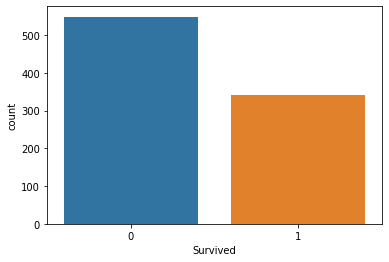

In [6]:
sns.countplot(x='Survived', data=df)

We can see that the no of passangers who survived is very less than the no of passangers who lost their life.

<AxesSubplot:xlabel='Survived', ylabel='count'>

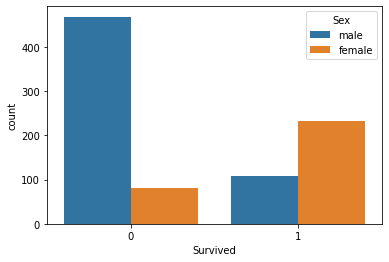

In [7]:
sns.countplot(x='Survived', hue='Sex', data=df)

From the data we can see the most no of females survived compared to the males, where most of males died compared to the females.

<AxesSubplot:xlabel='Survived', ylabel='count'>

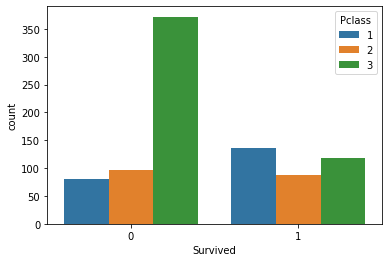

In [8]:
sns.countplot(x='Survived',hue='Pclass', data=df)

We can see that the majority of the people who did not survived were of 3rd class

<AxesSubplot:ylabel='Frequency'>

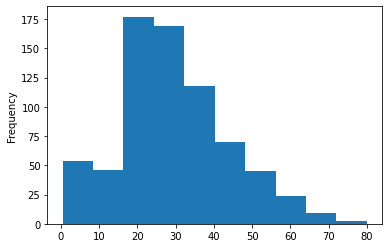

In [9]:
df['Age'].plot.hist()

We can see that the majority of people who were traveling were mostly in the age group of 20 to 50.

<AxesSubplot:ylabel='Frequency'>

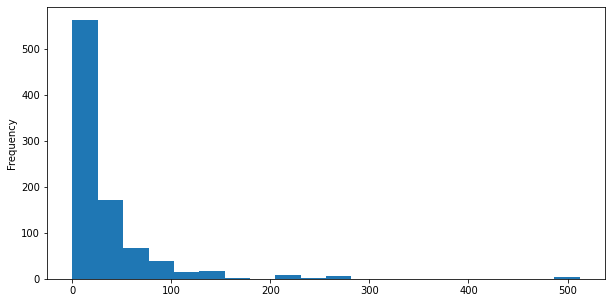

In [10]:
df['Fare'].plot.hist(bins=20, figsize=(10,5))

<AxesSubplot:xlabel='SibSp', ylabel='count'>

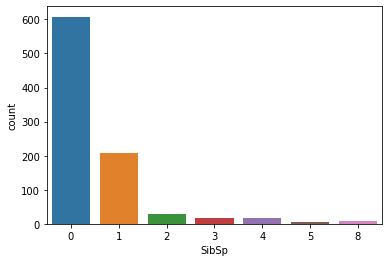

In [11]:
sns.countplot(x='SibSp', data=df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

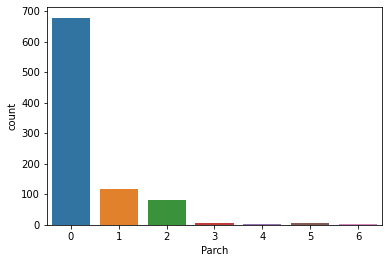

In [12]:
sns.countplot(x='Parch', data=df)

## Data Wrangling

We will check the null values and remove them

In [13]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have missing values in Age Column and Cabin Column, maximum being in the Cabin Column



<AxesSubplot:>

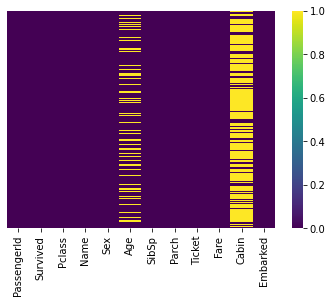

In [15]:
sns.heatmap(df.isnull(),yticklabels=False, cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

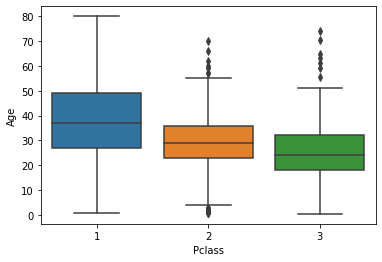

In [16]:
sns.boxplot(x='Pclass', y='Age', data=df)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can see that in Cabin column there are a lot of Null values, and we will drop that column.

In [18]:
df.drop('Cabin', axis=1, inplace=True)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Now we will drop the na values.

In [20]:
df.shape

(891, 11)

In [21]:
df.dropna(inplace=True)

In [22]:
df.shape

(712, 11)

<AxesSubplot:>

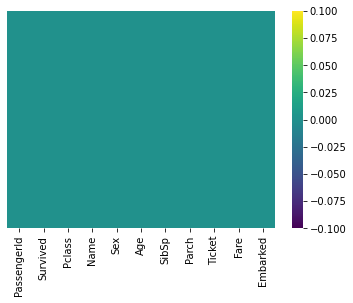

In [23]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

In [24]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


From the dataset we can see that we have 'Sex','Embarked','Pclass', column as categorical columm etc. We will convert all the categorical values into numerical values using labelencoding and onehotencoding on top of it, or we can simply use pd.get_dummies function here.

In [26]:
sex = pd.get_dummies(df['Sex'])
sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


From the above we can say that the sex column has been divided into two subcolumns into Female and Male, here instead of both the column we can drop one of the column, as we can identify the details of which female survied or died or which male survived or died from either of the columns.



In [27]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


We will perform the same dummies function on the Embarked column as well

In [28]:
embarked = pd.get_dummies(df['Embarked'], drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
886,0,1
887,0,1
889,0,0


We will perform the same function on Pclass column as well

In [29]:
Pclass = pd.get_dummies(df['Pclass'], drop_first=True)
Pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
885,0,1
886,1,0
887,0,0
889,0,0


In [30]:
df = pd.concat([df, sex,embarked,Pclass], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,0,1,0,0,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0,0,0


Now we will drop the non important columns from the dataset

In [31]:
df.drop(['PassengerId', 'Pclass', 'Sex', 'Embarked','Name', 'Ticket'],axis=1, inplace=True)

In [32]:
df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [33]:
df.shape

(712, 10)

We will convert the data into Dependent and Independent Variable

In [34]:
X = df.drop(['Survived'],axis=1)
X

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
885,39.0,0,5,29.1250,0,1,0,0,1
886,27.0,0,0,13.0000,1,0,1,1,0
887,19.0,0,0,30.0000,0,0,1,0,0
889,26.0,0,0,30.0000,1,0,0,0,0


In [35]:
Y = df['Survived']
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

We will transform the data into training and testing data.

In [36]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3,random_state=99)

In [37]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((498, 9), (214, 9), (498,), (214,))

Decision Tree 

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt = DecisionTreeClassifier()

In [40]:
dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [41]:
Features = pd.DataFrame({'Features' : train_x.columns, 'Importance' : dt.feature_importances_})
Features.sort_values('Importance', ascending=False)

,Features,Importance
0,Age,0.312160
4,male,0.267834
3,Fare,0.226525
8,3,0.092826
1,SibSp,0.029862
6,S,0.023916
2,Parch,0.022296
7,2,0.018557
5,Q,0.006025


In [42]:
y_pred = dt.predict(test_x)

In [43]:
Result = pd.DataFrame({'Actual' : test_y, 'Predict' : y_pred})
Result

,Actual,Predict
436,0,0
309,1,1
317,0,0
641,1,1
630,1,0
...,...,...
225,0,0
756,0,0
416,1,1
789,0,0


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [45]:
accuracy_score(test_y,y_pred)

0.7429906542056075

In [46]:
confusion_matrix(test_y,y_pred)

array([[95, 28],
       [27, 64]])

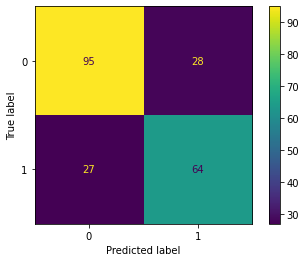

In [47]:
plot_confusion_matrix(dt,test_x,test_y)

We will plot decision tree

[Text(444.61221590909093, 789.9187499999999, 'male <= 0.5\ngini = 0.478\nsamples = 498\nvalue = [301, 197]\nclass = 0'),
 Text(211.36363636363637, 738.95625, '3 <= 0.5\ngini = 0.399\nsamples = 182\nvalue = [50, 132]\nclass = 1'),
 Text(84.54545454545455, 687.99375, 'Age <= 2.5\ngini = 0.137\nsamples = 108\nvalue = [8, 100]\nclass = 1'),
 Text(56.36363636363637, 637.03125, 'Parch <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(45.09090909090909, 586.06875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(67.63636363636364, 586.06875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(112.72727272727273, 637.03125, 'Fare <= 28.856\ngini = 0.123\nsamples = 106\nvalue = [7, 99]\nclass = 1'),
 Text(90.18181818181819, 586.06875, 'Fare <= 28.231\ngini = 0.219\nsamples = 48\nvalue = [6, 42]\nclass = 1'),
 Text(78.9090909090909, 535.10625, 'Age <= 56.0\ngini = 0.19\nsamples = 47\nvalue = [5, 42]\nclass = 1'),
 Text(67.63636363636364, 484.14375, 'Age <= 

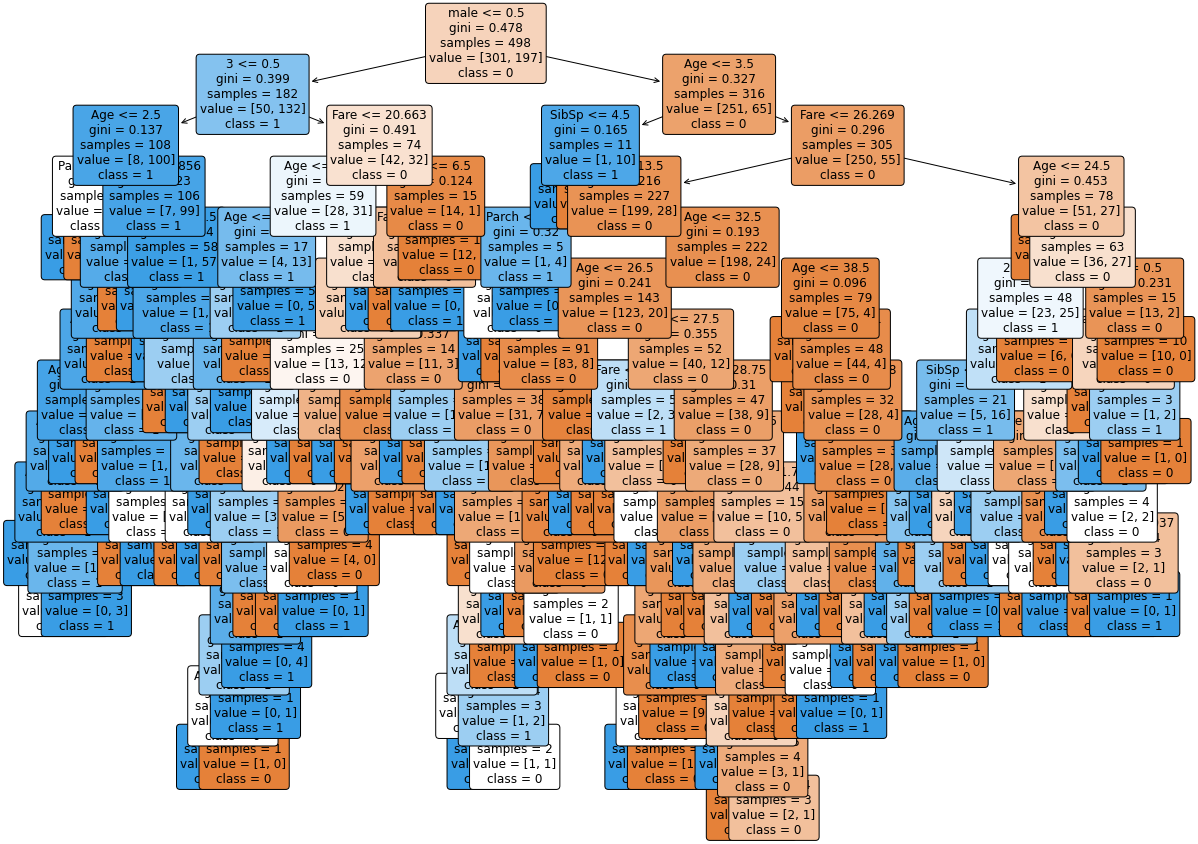

In [48]:
plt.figure(figsize=(20,15))

tree.plot_tree(dt, feature_names=train_x.columns,class_names=['0','1'], filled = True, rounded = True, fontsize=12)